In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("Mall_Customers.csv")
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


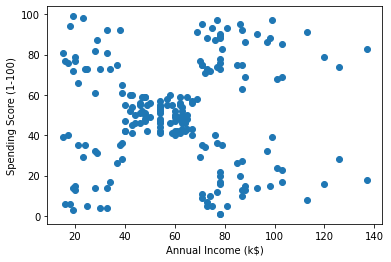

In [14]:
#visualization
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [15]:
#input
x=data.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
from sklearn.cluster import KMeans

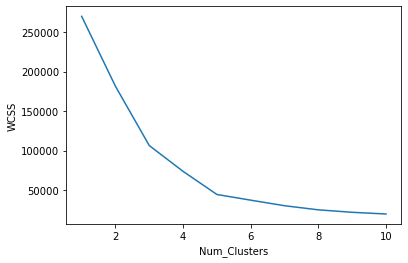

In [23]:
#the_most_optimum_number_of_clusters-->elbow method(WCSS)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#visualization    
plt.plot(range(1,11),wcss)   
plt.xlabel("Num_Clusters")
plt.ylabel("WCSS")
plt.show()
#n_clusters(K)---->5

In [24]:
#build_model
kmeans_model=KMeans(n_clusters=5)

In [25]:
clusters=kmeans_model.fit_predict(x)
clusters

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [27]:
#add_clusters-->as_new_col
data["Cluster(0:4)"]=clusters
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster(0:4)
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,4,4
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,4,4
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,3,3
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,3,3


In [28]:
#centroids-->5
kmeans_model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [29]:
#labels
kmeans_model.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [31]:
#iterations
kmeans_model.n_iter_

3

In [35]:
#show_clusters
cluster0=data[data["Cluster(0:4)"]==0]
cluster1=data[data["Cluster(0:4)"]==1]
cluster2=data[data["Cluster(0:4)"]==2]
cluster3=data[data["Cluster(0:4)"]==3]
cluster4=data[data["Cluster(0:4)"]==4]

In [37]:
cluster0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster(0:4)
123,124,Male,39,69,91,0,0
125,126,Female,31,70,77,0,0
127,128,Male,40,71,95,0,0
129,130,Male,38,71,75,0,0
131,132,Male,39,71,75,0,0
133,134,Female,31,72,71,0,0
135,136,Female,29,73,88,0,0
137,138,Male,32,73,73,0,0
139,140,Female,35,74,72,0,0
141,142,Male,32,75,93,0,0


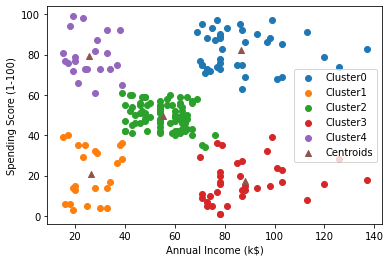

In [49]:
#scattering
plt.scatter(cluster0["Annual Income (k$)"],cluster0["Spending Score (1-100)"],label="Cluster0")
plt.scatter(cluster1["Annual Income (k$)"],cluster1["Spending Score (1-100)"],label="Cluster1")
plt.scatter(cluster2["Annual Income (k$)"],cluster2["Spending Score (1-100)"],label="Cluster2")
plt.scatter(cluster3["Annual Income (k$)"],cluster3["Spending Score (1-100)"],label="Cluster3")
plt.scatter(cluster4["Annual Income (k$)"],cluster4["Spending Score (1-100)"],label="Cluster4")
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],label="Centroids",marker="^")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [53]:
#evaluation
from sklearn.metrics import silhouette_score
score=silhouette_score(x , kmeans_model.labels_)
score

0.553931997444648